In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import timedelta
import matplotlib.pyplot as plt

# Проект e-commerce
#### Продакт-менеджер попросил проанализировать совершенные покупки и ответить на следующие вопросы:
1. Сколько у нас пользователей, которые совершили покупку только один раз?  

2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)? 

3. По каждому товару определить, в какой день недели товар чаще всего покупается. 

4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть.

5. Используя pandas, проведи когортный анализ пользователей. В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц.

6. Часто для качественного анализа аудитории использую подходы, основанные на сегментации. Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию. В кластеризации можешь выбрать следующие метрики: R - время от последней покупки пользователя до текущей даты, F - суммарное количество покупок у пользователя за всё время, M - сумма покупок за всё время.

In [2]:
customers = pd.read_csv('~/projects/olist_customers_dataset.csv')
orders = pd.read_csv('~/projects/olist_orders_dataset.csv')
items = pd.read_csv('~/projects/olist_order_items_dataset.csv')
orders[['order_purchase_timestamp', 'order_approved_at', \
        'order_delivered_carrier_date', 'order_delivered_customer_date',\
        'order_estimated_delivery_date']]=orders[['order_purchase_timestamp', 'order_approved_at', \
        'order_delivered_carrier_date', 'order_delivered_customer_date',\
        'order_estimated_delivery_date']].apply(pd.to_datetime)
items['shipping_limit_date'] = pd.to_datetime(items['shipping_limit_date'])

In [3]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [5]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


### 1. Сколько у нас пользователей, которые совершили покупку только один раз?

In [6]:
purchases= orders[['customer_id', 'order_purchase_timestamp', 'order_id', 'order_status', 'order_approved_at', 'order_delivered_customer_date']]

In [7]:
purchases_1 = purchases.dropna().query("order_status != 'canceled' and order_status == 'delivered'")\
                       .groupby(['customer_id'], as_index = False)\
                       .agg({'order_id':'count'}) 
# дропаем пустые значения по доставке и оплате и группируем по клиентам(позаказный) и считаем количество заказов для каждого

Покупкой будем считать факт того, что продукт оказался у конечного пользователя, т.е. подтверждение оплаты и осуществленная доставка, даже если оплата подверждена, а доставка не сделана мы не будем считать это покупкой, а также не заказ должен быть не отмененным. 

In [8]:
purchases_1.merge(customers, how='inner', on='customer_id')\
           .groupby('customer_unique_id', as_index=False)\
           .agg({'order_id':'count'})\
           .query("order_id==1")\
           .customer_unique_id.count() 
# объединяем по клиентам(позаказный), группируем по уникальным пользователям
# снова считаем количество заказов для каждого и оставляем только тех пользователей, количество заказов, которые равны 1
# считаем кол-во уникальных пользователей, которые совершили покупку один раз

90537

### 2. Сколько заказов в месяц в среднем не доставляется по разным причинам?

In [9]:
notdelivered = orders.query("order_status in ('canceled', 'unavailable')")
notdelivered.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05
397,1b9ecfe83cdc259250e1a8aca174f0ad,6d6b50b66d79f80827b6d96751528d30,canceled,2018-08-04 14:29:27,2018-08-07 04:10:26,NaT,NaT,2018-08-14
586,c272bcd21c287498b4883c7512019702,9582c5bbecc65eb568e2c1d839b5cba1,unavailable,2018-01-31 11:31:37,2018-01-31 14:23:50,NaT,NaT,2018-02-16
613,714fb133a6730ab81fa1d3c1b2007291,e3fe72696c4713d64d3c10afe71e75ed,canceled,2018-01-26 21:34:08,2018-01-26 21:58:39,2018-01-29 22:33:25,NaT,2018-02-22
687,37553832a3a89c9b2db59701c357ca67,7607cd563696c27ede287e515812d528,unavailable,2017-08-14 17:38:02,2017-08-17 00:15:18,NaT,NaT,2017-09-05


Заказ не доставляется по двум причинам: отменен(вина на клиенте), недоступен(вина на магазине).

In [10]:
notdelivered_mean = notdelivered\
                    .groupby([orders.order_purchase_timestamp.dt.to_period('M'), 'order_status'], as_index=False)['order_id']\
                    .count().groupby('order_status', as_index=False).agg({'order_id':'mean'})\
                    .rename(columns={'order_id':'mean'}).round({'mean':2})
notdelivered_mean
# считаем среднее количество не доставленных заказов в месяц с детализацией по причинам 

,order_status,mean
0,canceled,26.04
1,unavailable,29.00


Canceled отнесем к несостоявщимся заказам по вине клиента, unavailable отнесем к несостоявщимся заказам по вине магазина.
В месяц в среднем из-за отмены не доставляется 26.04 заказа, из-за недоступности 29 заказов.

### 3. По каждому товару определить, в какой день недели товар чаще всего покупается. 

In [11]:
products=purchases.dropna().query("order_status != 'canceled' and order_status == 'delivered'")\
                  .merge(items, how='inner', on='order_id')[['order_purchase_timestamp','order_id', 'product_id']]
products.head()
# оставляем order_id, которые подходят под описание 'покупка', мерджим с данными о товарах по order_id 
# получаем список товаров и время в которое был сделан заказ

,order_purchase_timestamp,order_id,product_id
0,2017-10-02 10:56:33,e481f51cbdc54678b7cc49136f2d6af7,87285b34884572647811a353c7ac498a
1,2018-07-24 20:41:37,53cdb2fc8bc7dce0b6741e2150273451,595fac2a385ac33a80bd5114aec74eb8
2,2018-08-08 08:38:49,47770eb9100c2d0c44946d9cf07ec65d,aa4383b373c6aca5d8797843e5594415
3,2017-11-18 19:28:06,949d5b44dbf5de918fe9c16f97b45f8a,d0b61bfb1de832b15ba9d266ca96e5b0
4,2018-02-13 21:18:39,ad21c59c0840e6cb83a9ceb5573f8159,65266b2da20d04dbe00c5c2d3bb7859e


In [12]:
popular_weekday=products.groupby([products.order_purchase_timestamp.dt.weekday, 'product_id'])\
.agg({'product_id':'count'})\
.rename(columns={'product_id':'cnt'})\
.reset_index().pivot(index='order_purchase_timestamp',columns='product_id', values='cnt')\
.fillna(0)\
.idxmax().reset_index().rename(columns={0:'most_popular_weekday'})
popular_weekday.head()
# считаем покупки каждого товара по дням недели и выводим максимальное значение для каждого товара по дням, где 0-пн,6-вс

,product_id,most_popular_weekday
0,00066f42aeeb9f3007548bb9d3f33c38,6
1,00088930e925c41fd95ebfe695fd2655,1
2,0009406fd7479715e4bef61dd91f2462,3
3,000b8f95fcb9e0096488278317764d19,2
4,000d9be29b5207b54e86aa1b1ac54872,1


### 4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть.

In [13]:
mean_by_week=purchases.dropna().query("order_status != 'canceled' and order_status == 'delivered'")\
                      .merge(customers, on='customer_id')
# оставляем только осуществленные покупки и объединяем с данными о клиентах по customer_id

In [14]:
mean_by_week['days']=mean_by_week.order_purchase_timestamp.dt.days_in_month
# создаем новую колонку с количеством дней в месяце

In [15]:
mean_by_week = mean_by_week\
.groupby([orders.order_purchase_timestamp.dt.to_period('M'), 'days', 'customer_unique_id'])\
.agg({'order_id':'count'})\
.rename(columns={'order_id':'cnt'})\
.reset_index()
# группируем по месяцу, кол-ву дней и клиентам. аггрегируем по покупкам, чтоб понимать кол-во покупок для каждого клиента по месяцу

In [16]:
mean_by_week['mean']=mean_by_week.cnt/(mean_by_week.days/7)
# создаем новую колонку, в которой вычисляем сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)
# количество покупок делим на количество недель в месяце(=количество дней в месяце деленное на 7)

In [17]:
mean_by_week=mean_by_week[['customer_unique_id','order_purchase_timestamp','mean']]\
.rename(columns={'order_purchase_timestamp':'month'}).round({'mean':2})
mean_by_week.head()
# оставляем в данных только пользователей, месяц и среднюю покупку

,customer_unique_id,month,mean
0,249909f9236a3a49b9bc89689371aac0,2016-09,0.23
1,a1880e6eab84add66ef27968e0f500e3,2016-09,0.23
2,bf8e2ac0aef7f60dd02cbfe15b447804,2016-09,0.23
3,a3f3e2d8785b3f3614bc786b9515697c,2016-09,0.23
4,073d1252f3a5cce37d38726f1430c80e,2016-10,0.25


### 5. Используя pandas, проведи когортный анализ пользователей. В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц.

In [18]:
retention=purchases.dropna().query("order_status != 'canceled' and order_status == 'delivered'")\
                   .merge(customers, how='right' ,on='customer_id')[['customer_unique_id','order_purchase_timestamp']]
retention.order_purchase_timestamp = retention.order_purchase_timestamp.dt.to_period('M')
retention.head()
# создадим датафрейм с которым будем работать, выберем совершенные заказы, колонки, которые нам нужны и переведем дату в месяц

,customer_unique_id,order_purchase_timestamp
0,861eff4711a542e4b93843c6dd7febb0,2017-05
1,290c77bc529b7ac935b93aa66c333dc3,2018-01
2,060e732b5b29e8181a18229c7b0b2b5e,2018-05
3,259dac757896d24d7702b9acbbff3f3c,2018-03
4,345ecd01c38d18a9036ed96c73b8d066,2018-07


In [19]:
retention=retention.rename(columns={'order_purchase_timestamp':'purchase_month'})\
                   .query("purchase_month<='2018-03' and purchase_month>='2016-12'")

In [20]:
first_order = retention.groupby(['customer_unique_id'], as_index=False).agg({'purchase_month':'min'})\
                       .rename(columns={'purchase_month':'first_order'})
# создадим датафрейм с месяцем первой покупки для каждого пользователя

In [21]:
retention = retention.merge(first_order, on='customer_unique_id')\
                     .query("first_order<'2018-01' and first_order>'2016-12'")
retention.head()
# добавим в наш основной датафрейм дату первой покупки и ограничим 2017 годом, так как он полностью вмещает наш период январь-декабрь

,customer_unique_id,purchase_month,first_order
0,861eff4711a542e4b93843c6dd7febb0,2017-05,2017-05
3,4c93744516667ad3b8f1fb645a3116a4,2017-09,2017-09
4,4c93744516667ad3b8f1fb645a3116a4,2017-10,2017-09
6,57b2a98a409812fe9618067b6b8ebe4f,2017-11,2017-11
10,2a7745e1ed516b289ed9b29c7d0539a5,2017-11,2017-11


In [22]:
retention = retention.rename(columns={'purchase_month':'order_date'})
# переименовываем колонку для удобства

In [23]:
retention = retention.groupby(['first_order','order_date'])\
                     .agg({'customer_unique_id':'count'})
# группируем по дате первой покупки и датам покупок, считаем сколько покупок было сделано пользователями

In [24]:
def cohort(df):
    df['cohort'] = np.arange(len(df)) 
    return df
retention= retention.groupby(level=0).apply(cohort)
retention.head(5)             
# обозначим когорты

customer_unique_id  cohort
first_order order_date                            
2017-01     2017-01                    747       0
            2017-02                      2       1
            2017-03                      2       2
            2017-04                      1       3
            2017-05                      3       4

In [25]:
retention= retention.pivot_table(columns='cohort', index = 'first_order',values='customer_unique_id')
retention.head()
# сделаем вид таблицы удобнее

cohort,0,1,2,3,4,5,6,7,8,9,10,11,12,13
first_order,,,,,,,,,,,,,,
2017-01,747.0,2.0,2.0,1.0,3.0,1.0,3.0,1.0,1.0,3.0,1.0,5.0,3.0,1.0
2017-02,1639.0,3.0,5.0,2.0,7.0,2.0,4.0,3.0,1.0,3.0,2.0,5.0,2.0,3.0
2017-03,2541.0,12.0,9.0,12.0,9.0,4.0,4.0,8.0,8.0,2.0,9.0,3.0,5.0,NaN
2017-04,2285.0,15.0,6.0,5.0,6.0,6.0,9.0,7.0,7.0,4.0,6.0,2.0,NaN,NaN
2017-05,3516.0,17.0,16.0,10.0,10.0,12.0,16.0,5.0,9.0,11.0,9.0,NaN,NaN,NaN


In [26]:
retention = retention.div(retention[0], axis=0)
retention

cohort,0,1,2,3,4,5,6,7,8,9,10,11,12,13
first_order,,,,,,,,,,,,,,
2017-01,1.0,0.002677,0.002677,0.001339,0.004016,0.001339,0.004016,0.001339,0.001339,0.004016,0.001339,0.006693,0.004016,0.001339
2017-02,1.0,0.001830,0.003051,0.001220,0.004271,0.001220,0.002441,0.001830,0.000610,0.001830,0.001220,0.003051,0.001220,0.001830
2017-03,1.0,0.004723,0.003542,0.004723,0.003542,0.001574,0.001574,0.003148,0.003148,0.000787,0.003542,0.001181,0.001968,NaN
2017-04,1.0,0.006565,0.002626,0.002188,0.002626,0.002626,0.003939,0.003063,0.003063,0.001751,0.002626,0.000875,NaN,NaN
2017-05,1.0,0.004835,0.004551,0.002844,0.002844,0.003413,0.004551,0.001422,0.002560,0.003129,0.002560,NaN,NaN,NaN
2017-06,1.0,0.005175,0.004204,0.004204,0.003234,0.003881,0.003558,0.002264,0.001294,0.001940,NaN,NaN,NaN,NaN
2017-07,1.0,0.005758,0.003402,0.002355,0.003402,0.002094,0.003141,0.001047,0.002094,NaN,NaN,NaN,NaN,NaN
2017-08,1.0,0.007017,0.003871,0.002662,0.003387,0.005565,0.002903,0.002662,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,1.0,0.006878,0.005404,0.003685,0.004422,0.003193,0.002211,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:title={'center':'Cohort analysis. Retention'}, xlabel='cohort', ylabel='first_order'>

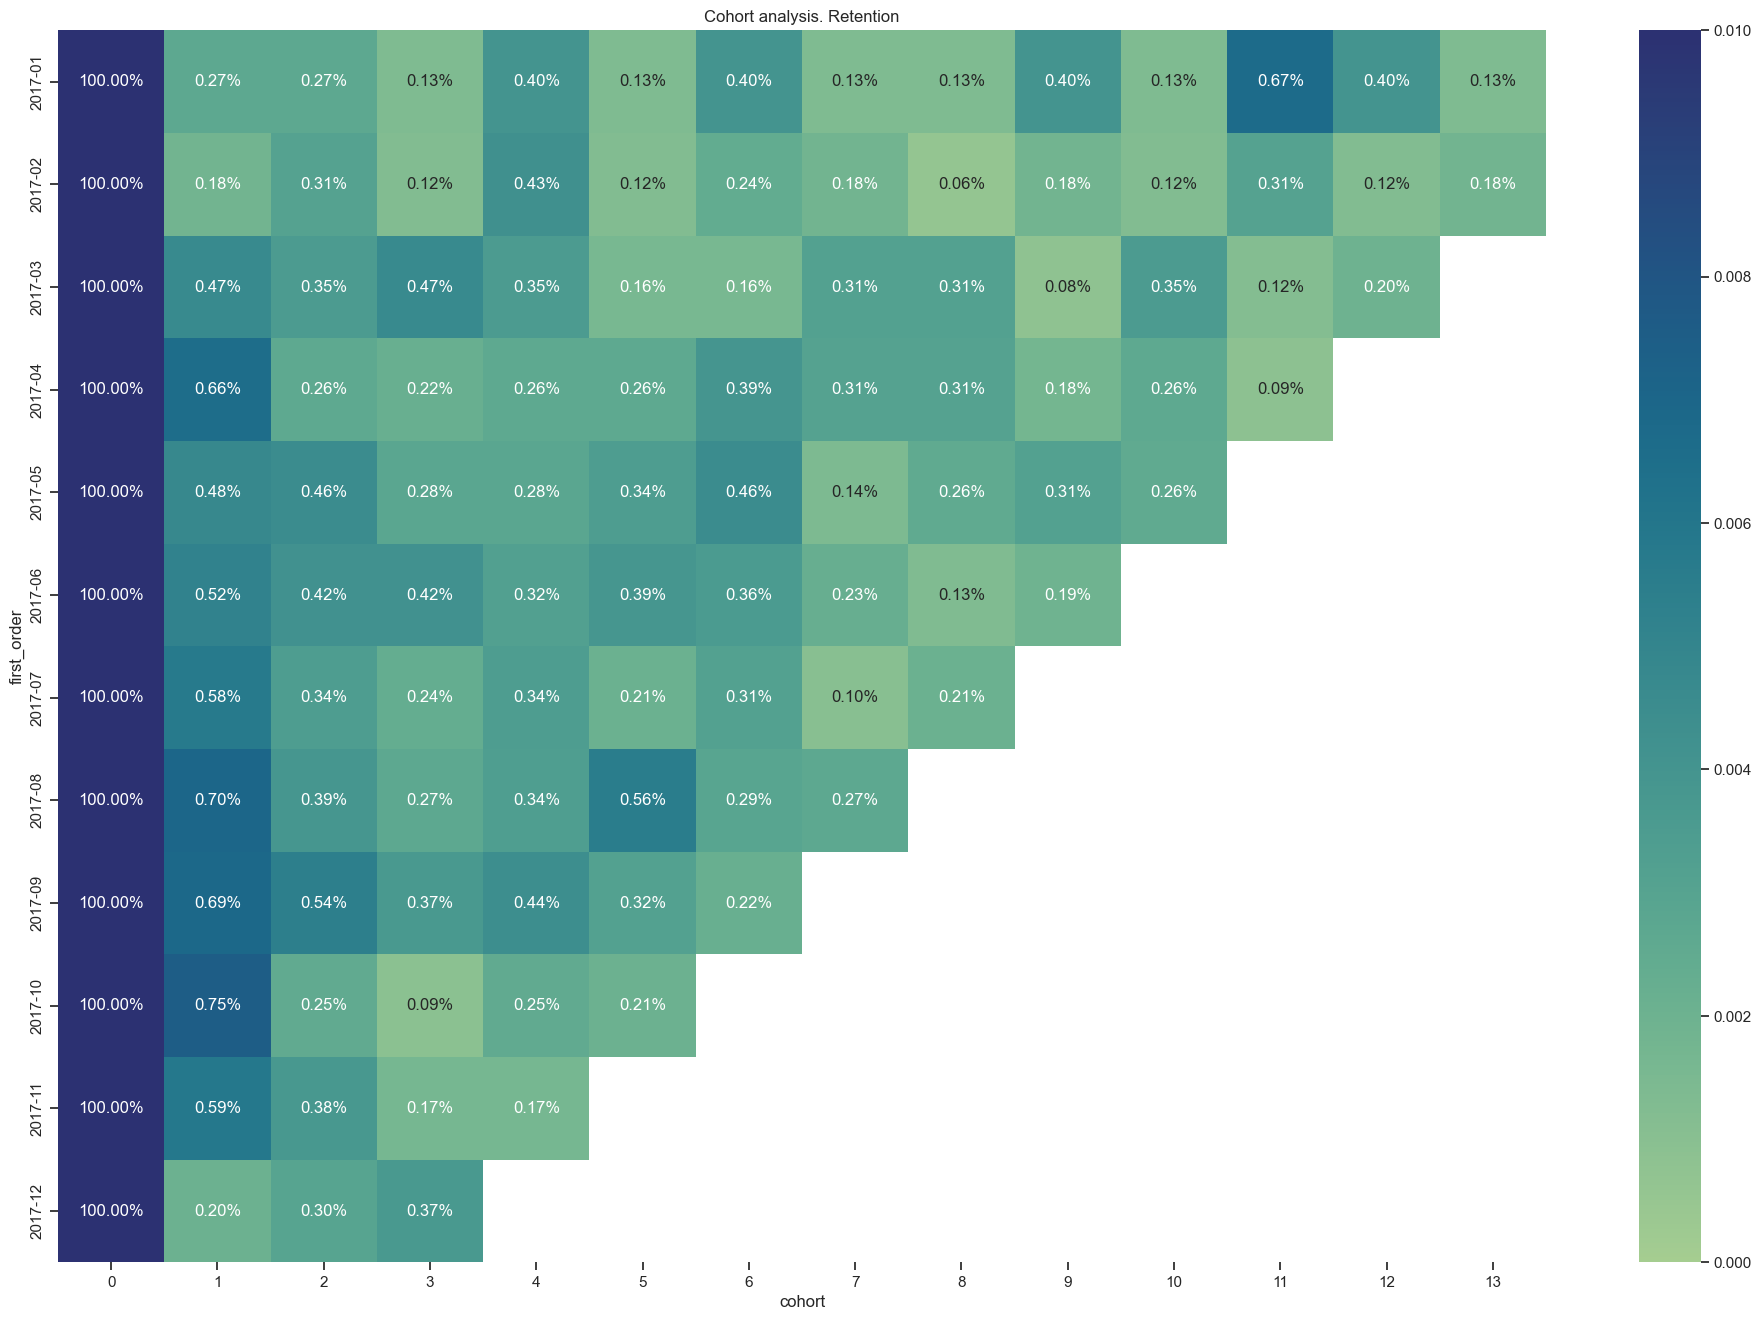

In [27]:
 # визуализиаруем получившуюся таблицу
sns.set(style='ticks')
plt.figure(figsize=(24, 16))
plt.title('Cohort analysis. Retention')
sns.heatmap(retention, vmin=0, vmax=0.01, cmap="crest", annot=True, fmt='.2%')

In [28]:
retention[3].idxmax()


Period('2017-03', 'M')

Когорта с самым высоким retention на 3-й месяц 'март 2017'

### 6. Часто для качественного анализа аудитории используют подходы, основанные на сегментации. Используя python, построить RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию.

In [29]:
df = orders.merge(customers, on='customer_id').merge(items, on='order_id')
# соединяем все три датасета

In [30]:
df = df.dropna().query("order_status != 'canceled' and order_status == 'delivered'")
# выбираем только совершенные заказы

In [31]:
df = df.groupby(['customer_unique_id','order_id','order_purchase_timestamp'], as_index=False)\
       .agg({'price':'sum'}).rename(columns={'price':'total_price','order_purchase_timestamp':'purchase_time'})
df.head()
# вычисляем стоимость всего заказа 

,customer_unique_id,order_id,purchase_time,total_price
0,0000366f3b9a7992bf8c76cfdf3221e2,e22acc9c116caa3f2b7121bbb380d08e,2018-05-10 10:56:27,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,3594e05a005ac4d06a72673270ef9ec9,2018-05-07 11:11:27,18.90
2,0000f46a3911fa3c0805444483337064,b33ec3b699337181488304f362a6b734,2017-03-10 21:05:03,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,41272756ecddd9a9ed0180413cc22fb6,2017-10-12 20:29:41,25.99
4,0004aac84e0df4da2b147fca70cf8255,d957021f1127559cd947b62533f484f7,2017-11-14 19:45:42,180.00


In [32]:
NOW = df['purchase_time'].max() + timedelta(days=1)
NOW
# для режима реального времени, устонавливаем NOW
# дату на один день после последней покупки

Timestamp('2018-08-30 15:00:37')

In [33]:
period=(df.purchase_time.max()-df.purchase_time.min())/np.timedelta64(1,'D') 
# устанавливаем период за который будем исследовать данные

In [34]:
df['days_since_order'] = df['purchase_time'].apply(lambda x: (NOW - x).days)
# добавляем столбец с количеством дней между покупкой и настоящим моментом

In [35]:
aggr = {
    'days_since_order': lambda x: x.min(),  # количество дней с последнего заказа (recency)
    'purchase_time': lambda x: len([d for d in x if d >= NOW - timedelta(days=period)]), # общее количество заказов за последний период(frequency)
}
rfm = df.groupby('customer_unique_id').agg(aggr).reset_index()
rfm.rename(columns={'days_since_order': 'recency', 'purchase_time': 'frequency'}, inplace=True)
rfm.head()

,customer_unique_id,recency,frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1
2,0000f46a3911fa3c0805444483337064,537,1
3,0000f6ccb0745a6a4b88665a16c9f078,321,1
4,0004aac84e0df4da2b147fca70cf8255,288,1


In [36]:
rfm['monetary'] = rfm['customer_unique_id'].apply(lambda x: df[(df['customer_unique_id'] == x) & \
                                                           (df['purchase_time'] >= NOW - timedelta(days=period))]\
                                                           ['total_price'].sum())
rfm.head()
#добавим денежную стоимость каждого клиента, добавив продажи за последний год

,customer_unique_id,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,18.90
2,0000f46a3911fa3c0805444483337064,537,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,288,1,180.00


In [37]:
quintiles = rfm[['recency', 'frequency', 'monetary']].quantile([0.2, 0.4, 0.6, 0.8]).to_dict()
quintiles
# получаем квантили для каждого параметра

{'recency': {0.2: 92.0, 0.4: 177.0, 0.6: 268.0, 0.8: 382.0},
 'frequency': {0.2: 1.0, 0.4: 1.0, 0.6: 1.0, 0.8: 1.0},
 'monetary': {0.2: 39.9, 0.4: 69.9, 0.6: 109.9, 0.8: 179.9}}

In [38]:
rfm.frequency.value_counts()

1     90535
2      2572
3       181
4        28
5         9
6         5
7         3
9         1
0         1
15        1
Name: frequency, dtype: int64

In [39]:
quintiles = {'recency': {0.2: 92.0, 0.4: 177.0, 0.6: 268.0, 0.8: 382.0},
 'frequency': {0.2: 0.0, 0.4: 1.0, 0.6: 2.0, 0.8: 4.0},
 'monetary': {0.2: 39.9, 0.4: 69.9, 0.6: 109.9, 0.8: 179.9}}
# делаем данные по frequency более репрезентативными

In [40]:
def r_score(x):
    if x <= quintiles['recency'][0.2]:
        return 5
    elif x <= quintiles['recency'][0.4]:
        return 4
    elif x <= quintiles['recency'][0.6]:
        return 3
    elif x <= quintiles['recency'][0.8]:
        return 2
    else:
        return 1

def fm_score(x, c):
    if x <= quintiles[c][0.2]:
        return 1
    elif x <= quintiles[c][0.4]:
        return 2
    elif x <= quintiles[c][0.6]:
        return 3
    elif x <= quintiles[c][0.8]:
        return 4
    else:
        return 5 
# вводим функцию для присваения рангов от 1 до 5, где 1-худший, 5-лучший

In [41]:
rfm['R'] = rfm['recency'].apply(lambda x: r_score(x))
rfm['F'] = rfm['frequency'].apply(lambda x: fm_score(x, 'frequency'))
rfm['M'] = rfm['monetary'].apply(lambda x: fm_score(x, 'monetary'))
# присваиваем ранги

In [42]:
rfm['rfm_score'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)
rfm.head()

,customer_unique_id,recency,frequency,monetary,R,F,M,rfm_score
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,129.90,4,2,4,424
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,18.90,4,2,1,421
2,0000f46a3911fa3c0805444483337064,537,1,69.00,1,2,2,122
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,25.99,2,2,1,221
4,0004aac84e0df4da2b147fca70cf8255,288,1,180.00,2,2,5,225


Oценки RFM дают нам 125 сегментов, мы будем работать с 11 сегментами на основе показателей R и F(анализ по давности и частоте покупок).Показывает, как часто клиенты совершают покупки за анализируемый период и позволяет выявить клиентов, которые недавно что-то купили и сотрудничают с компанией постоянно.

In [43]:
segt_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at risk',
    r'[1-2]5': 'can\'t loose',
    r'3[1-2]': 'about to sleep',
    r'33': 'need attention',
    r'[3-4][4-5]': 'loyal customers',
    r'41': 'promising',
    r'51': 'new customers',
    r'[4-5][2-3]': 'potential loyalists',
    r'5[4-5]': 'champions'
}

rfm['segment'] = rfm['R'].map(str) + rfm['F'].map(str)
rfm['segment'] = rfm['segment'].replace(segt_map, regex=True)
rfm.head()
# делим на сегменты

,customer_unique_id,recency,frequency,monetary,R,F,M,rfm_score,segment
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,129.90,4,2,4,424,potential loyalists
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,18.90,4,2,1,421,potential loyalists
2,0000f46a3911fa3c0805444483337064,537,1,69.00,1,2,2,122,hibernating
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,25.99,2,2,1,221,hibernating
4,0004aac84e0df4da2b147fca70cf8255,288,1,180.00,2,2,5,225,hibernating


In [44]:
RFM= rfm.groupby('segment', as_index=False)\
.agg({'customer_unique_id':'count'})\
.sort_values('customer_unique_id', ascending=False)\
.rename(columns={'customer_unique_id':'cnt'})
RFM['%']=RFM.cnt/RFM['cnt'].sum()*100
RFM

,segment,cnt,%
7,potential loyalists,37305,39.968501
4,hibernating,36213,38.798534
0,about to sleep,18105,19.397660
1,at risk,986,1.056398
6,need attention,567,0.607483
5,loyal customers,99,0.106068
3,champions,60,0.064284
2,can't loose,1,0.001071


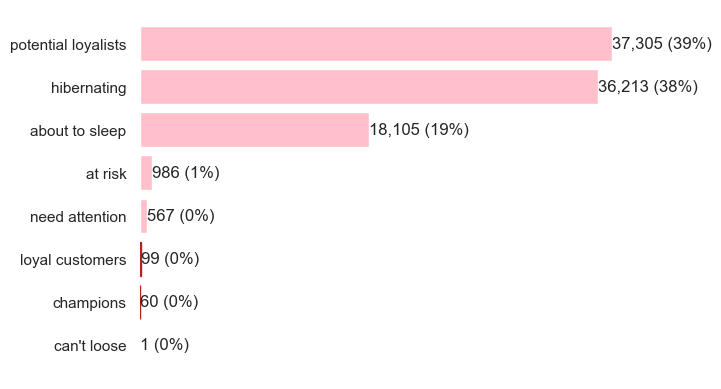

In [45]:
# визуализируем
segments_counts = rfm['segment'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='pink')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['champions', 'loyal customers']:
            bar.set_color('firebrick')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )
plt.show()

Большая часть клиентов покупают продуцию довольно редко и очень близки к потери (что подтверждает наше предыдущее исследование о том, что большая часть клиентов сделала всего одну покупку).Положительным моментом из нашего анализа можно оставить то, что около 39% являются потенциальными лояльными клиентами, которые мы можем постараться перевести в категорию "лояльные клиенты".